<a href="https://colab.research.google.com/github/roghayefazli/emotion-detection-from-text/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
s = str.maketrans('', '', punctuation)
a = 'salam!@'
a.translate(s)

'salam'

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
from zipfile import ZipFile
import os

# Define the path to the zip file
zip_file_path = '/content/data.zip'

# Define the directory to extract the zip file
extract_dir = '/content/'

# Create the directory if it does not exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the extracted directory
print(os.listdir(extract_dir))

['data']


In [ ]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('data/neg'):
    with open('data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))
len(negative_documents)

1000

In [ ]:
max_len_negative

1400

In [ ]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('data/pos'):
    with open('data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
len(positive_documents)

1000

In [ ]:
max_len_positive

1693

In [ ]:
max_len = max(max_len_negative, max_len_positive)

In [ ]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [ ]:
X_train = negative_documents[:800] + positive_documents[:800]

In [ ]:
len(X_train)

1600

In [ ]:
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]

In [ ]:
len(y_train)

1600

In [ ]:
X_test = negative_documents[800:] + positive_documents[800:]
len(X_test)

400

In [ ]:
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [ ]:
max_len

1693

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
import pickle
with open('tokenizer.h5', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
tokenizer

In [ ]:
vocab_len = len(tokenizer.word_index) + 1

In [ ]:
vocab_len

40289

In [ ]:
encoded = tokenizer.texts_to_sequences(X_train)

In [ ]:
encoded[0]

[2097,
 209,
 202,
 6111,
 3404,
 5222,
 6112,
 1249,
 2143,
 545,
 9213,
 122,
 14881,
 315,
 6471,
 554,
 3527,
 203,
 66,
 6111,
 181,
 1394,
 657,
 4959,
 7325,
 14882,
 2643,
 4960,
 2338,
 78,
 3,
 29,
 9,
 108,
 8474,
 156,
 622,
 41,
 23678,
 1513,
 4184,
 4960,
 538,
 119,
 338,
 214,
 18063,
 475,
 4730,
 1736,
 1,
 131,
 708,
 1918,
 3309,
 147,
 4960,
 842,
 2784,
 3,
 385,
 2098,
 775,
 18064,
 738,
 1287,
 1,
 21,
 3641,
 2,
 87,
 15,
 9214,
 6472,
 2339,
 4961,
 191,
 1010,
 288,
 1104,
 4960,
 13,
 623,
 861,
 2224,
 843,
 3,
 3199,
 15,
 2643,
 175,
 255,
 1,
 52,
 3405,
 18,
 12808,
 7326,
 404,
 7,
 1,
 392,
 554,
 14883,
 161,
 2933,
 2515,
 3,
 3642,
 181,
 83,
 995,
 3528,
 12809,
 4960,
 215,
 12809,
 481,
 33,
 219,
 437,
 1315,
 371,
 1573,
 74,
 303,
 65,
 18,
 563,
 577,
 1737,
 18065,
 18066,
 177,
 6111,
 5223,
 977,
 227,
 590,
 4962,
 8475,
 18067,
 4963,
 14884,
 2058,
 1089,
 190,
 2274,
 13,
 55,
 4960,
 1394,
 52,
 23679,
 10159,
 6111,
 2581,
 23680,

In [ ]:
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

In [ ]:
padded.shape

(1600, 1693)

In [ ]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
dense1 = Dense(10, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(dense1)

In [ ]:
model = Model(inputs=[input1], outputs=output)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1693)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 1693, 100)         4028900   
                                                                 
 conv1d_1 (Conv1D)           (None, 1690, 32)          12832     
                                                                 
 dropout_1 (Dropout)         (None, 1690, 32)          0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 845, 32)           0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 27040)             0         
                                                           

In [ ]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [ ]:
padded_test.shape

(400, 1693)

In [ ]:
import numpy as np

In [ ]:
r= model.fit([padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test], np.array(y_test)))

Epoch 1/10
80/80 [==============================] - 14s 162ms/step - loss: 0.6891 - accuracy: 0.5437 - val_loss: 0.6871 - val_accuracy: 0.5575
Epoch 2/10
80/80 [==============================] - 13s 161ms/step - loss: 0.6019 - accuracy: 0.6681 - val_loss: 0.6041 - val_accuracy: 0.6250
Epoch 3/10
80/80 [==============================] - 13s 163ms/step - loss: 0.3956 - accuracy: 0.9300 - val_loss: 0.5232 - val_accuracy: 0.8450
Epoch 4/10
80/80 [==============================] - 13s 164ms/step - loss: 0.3121 - accuracy: 0.9831 - val_loss: 0.5177 - val_accuracy: 0.8125
Epoch 5/10
80/80 [==============================] - 13s 158ms/step - loss: 0.2787 - accuracy: 0.9969 - val_loss: 0.4960 - val_accuracy: 0.8375
Epoch 6/10
80/80 [==============================] - 13s 157ms/step - loss: 0.2593 - accuracy: 0.9994 - val_loss: 0.4907 - val_accuracy: 0.8325
Epoch 7/10
80/80 [==============================] - 13s 159ms/step - loss: 0.2425 - accuracy: 0.9987 - val_loss: 0.4766 - val_accuracy: 0.8450

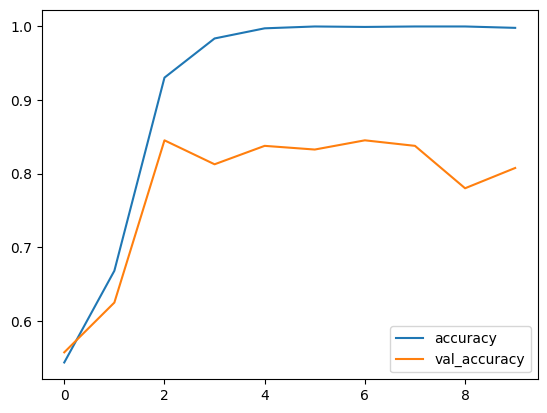

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('textcnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


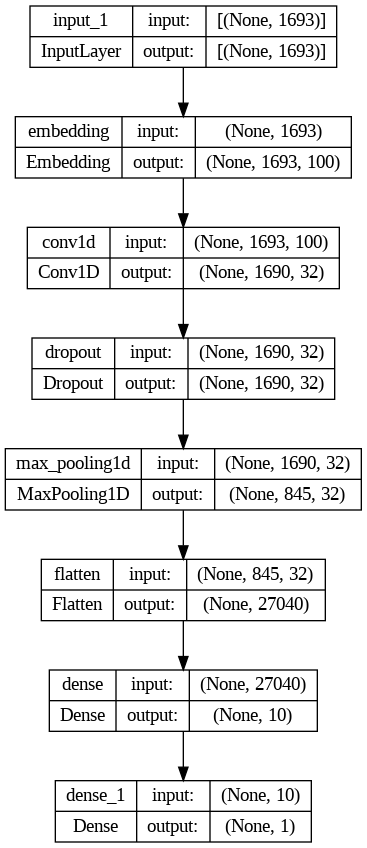

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('textcnn.h5')

In [ ]:
with open('tokenizer.h5', 'rb') as f:
    tokenizer = pickle.load(f)

In [ ]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'good': 7,
 'time': 8,
 'would': 9,
 'story': 10,
 'much': 11,
 'character': 12,
 'also': 13,
 'get': 14,
 'two': 15,
 'characters': 16,
 'first': 17,
 'see': 18,
 'well': 19,
 'way': 20,
 'could': 21,
 'make': 22,
 'really': 23,
 'films': 24,
 'life': 25,
 'little': 26,
 'people': 27,
 'plot': 28,
 'scene': 29,
 'never': 30,
 'bad': 31,
 'man': 32,
 'best': 33,
 'many': 34,
 'scenes': 35,
 'new': 36,
 'know': 37,
 'movies': 38,
 'great': 39,
 'another': 40,
 'love': 41,
 'director': 42,
 'action': 43,
 'us': 44,
 'still': 45,
 'back': 46,
 'go': 47,
 'seems': 48,
 'something': 49,
 'end': 50,
 'made': 51,
 'work': 52,
 'makes': 53,
 'big': 54,
 'world': 55,
 'however': 56,
 'every': 57,
 'enough': 58,
 'though': 59,
 'seen': 60,
 'better': 61,
 'around': 62,
 'going': 63,
 'audience': 64,
 'take': 65,
 'performance': 66,
 'role': 67,
 'may': 68,
 'gets': 69,
 'years': 70,
 'real': 71,
 'funny': 72,
 'last': 73,
 'l

In [ ]:
tokenizer

In [ ]:
txt_code = tokenizer.texts_to_sequences('really drug')
txt = pad_sequences(txt_code, maxlen=max_len, padding='post')

In [ ]:
txt_code

[[715], [913], [], [822], [822], [], [], [], [], []]

In [ ]:
t = model.predict(txt)

1/1 [==============================] - 0s 32ms/step


In [ ]:
t

array([[0.337248  ],
       [0.33723092],
       [0.3378893 ],
       [0.33715907],
       [0.33715907],
       [0.3378893 ],
       [0.3378893 ],
       [0.3378893 ],
       [0.3378893 ],
       [0.3378893 ]], dtype=float32)

In [ ]:
text = tokenizer.sequences_to_texts(t)

In [ ]:
text

['', '', '', '', '', '', '', '', '', '']